<a href="https://colab.research.google.com/github/Dionstef/House-price-prediction/blob/main/70s_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>



###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# %pip install --upgrade plotly

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

###Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

* Shape of `data`.
* Number of  rows and columns.
* Column names.


In [ ]:
data.shape

(506, 14)

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
384,20.08,0.00,18.10,0.00,0.70,4.37,91.20,1.44,24.00,666.00,20.20,285.83,30.63,8.80
101,0.11,0.00,8.56,0.00,0.52,6.78,71.30,2.86,5.00,384.00,20.90,395.58,7.67,26.50
38,0.18,0.00,5.96,0.00,0.50,5.97,30.20,3.85,5.00,279.00,19.20,393.43,10.13,24.70
421,7.02,0.00,18.10,0.00,0.72,6.01,95.30,1.87,24.00,666.00,20.20,319.98,15.70,14.20
380,88.98,0.00,18.10,0.00,0.67,6.97,91.90,1.42,24.00,666.00,20.20,396.90,17.21,10.40


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.duplicated().any()

False

## Descriptive Statistics

* Number of students per teacher on average.
* Average price of a home.
* `CHAS` feature.
* Minimum and the maximum value of the `CHAS`.
* Maximum and the minimum number of rooms per dwelling.

In [ ]:
data['PTRATIO'].mean()

18.455533596837945

In [ ]:
average_price = data['PRICE'].mean()*1000

In [ ]:
average_price = "{:.2f}".format(average_price)

In [ ]:
display(f'The average price of owner-occupied homes is ${average_price}')

'The average price of owner-occupied homes is $22532.81'

In [ ]:
 data['CHAS'].max()


1.0

In [ ]:
 data['CHAS'].min()

0.0

In [ ]:
data['RM'].min()

3.561

In [ ]:
data['RM'].max()

8.78

## Visualise the Features

Bar chart and Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 


#### House Prices 💰

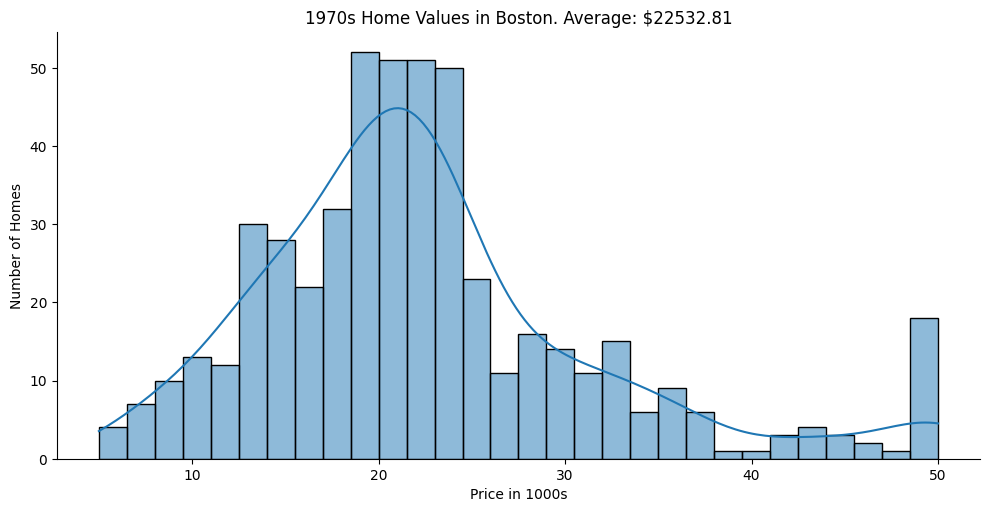

In [ ]:
sns.displot(data=data, x="PRICE",aspect=2, kde=True, bins=30)

plt.title(f'1970s Home Values in Boston. Average: ${average_price}')
plt.xlabel('Price in 1000s')
plt.ylabel('Number of Homes')

plt.show()

#### Distance to Employment - Length of Commute 🚗

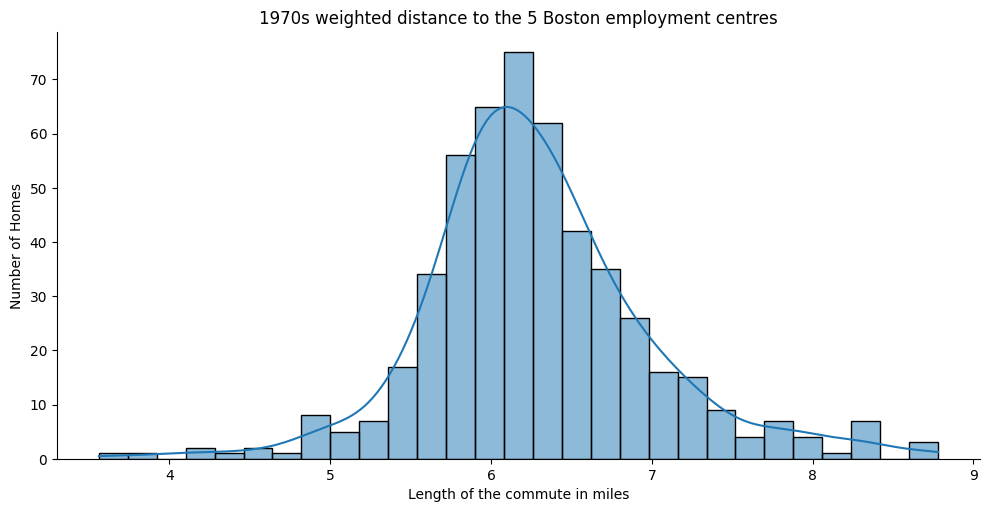

In [ ]:
sns.displot(data=data, x="RM",aspect=2, kde=True)

plt.title(f'1970s weighted distance to the 5 Boston employment centres')
plt.xlabel('Length of the commute in miles')
plt.ylabel('Number of Homes')

plt.show()


#### Number of Rooms

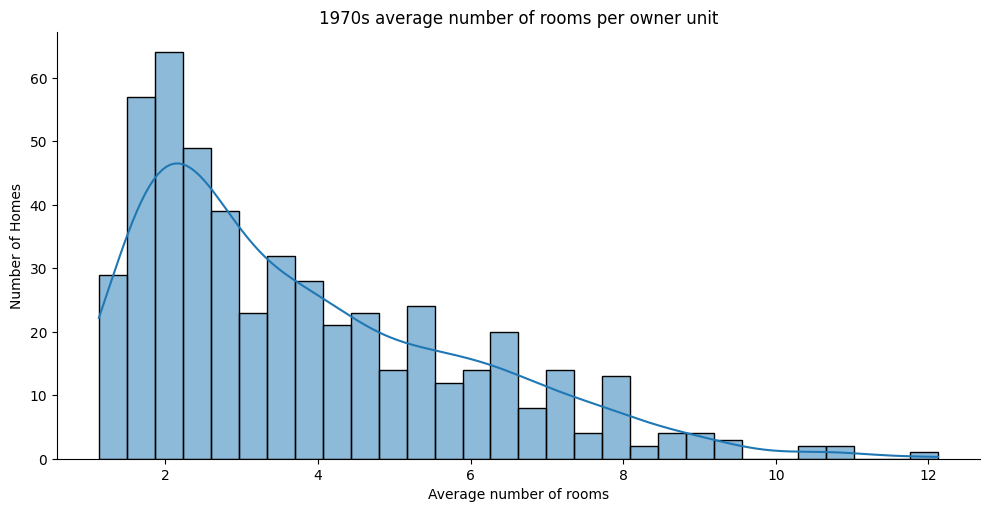

In [ ]:
sns.displot(data=data, x="DIS",aspect=2, kde=True, bins=30)

plt.title(f'1970s average number of rooms per owner unit')
plt.xlabel('Average number of rooms')
plt.ylabel('Number of Homes')

plt.show()

#### Access to Highways 🛣

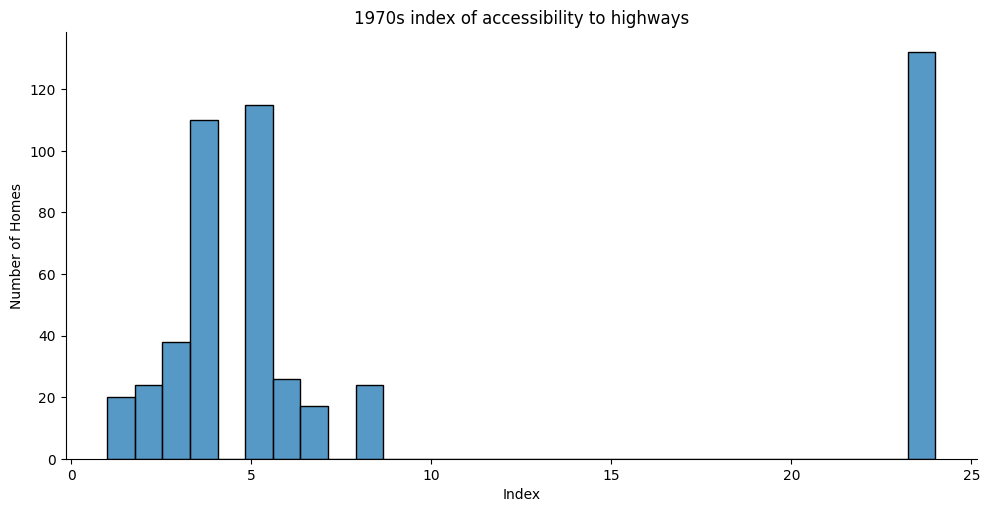

In [ ]:
sns.displot(data=data, x="RAD",aspect=2, bins=30)

plt.title(f'1970s index of accessibility to highways')
plt.xlabel('Index')
plt.ylabel('Number of Homes')

plt.show()

#### Next to the River? ⛵️


Bar chart with plotly for CHAS to show how many homes are away from the river versus next to it.

In [ ]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.Aggrnyl,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot
 
Seaborn plot to visualise the following relationships:

* Pollution (NOX) and the distance to employment (DIS). 
* Number of rooms (RM) and the home value (PRICE).
* Amount of poverty in an area (LSTAT) and home prices.

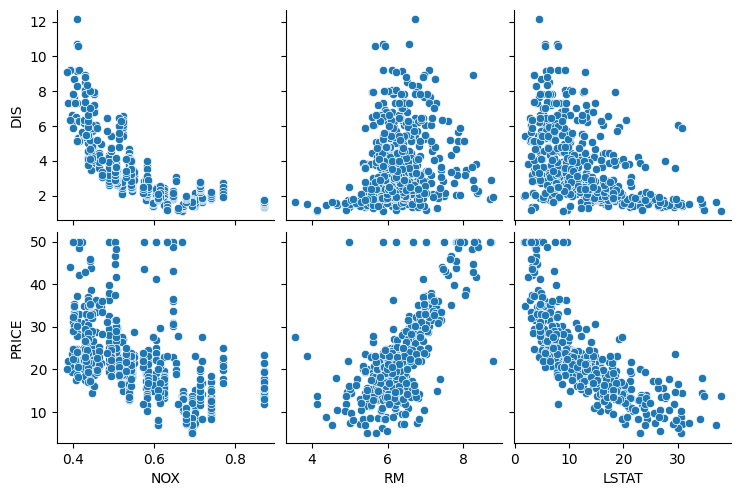

In [ ]:
sns.pairplot(data,  x_vars=["NOX", "RM", "LSTAT"],
    y_vars=["DIS", "PRICE"])
plt.show()

Jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE


#### Distance from Employment vs. Pollution



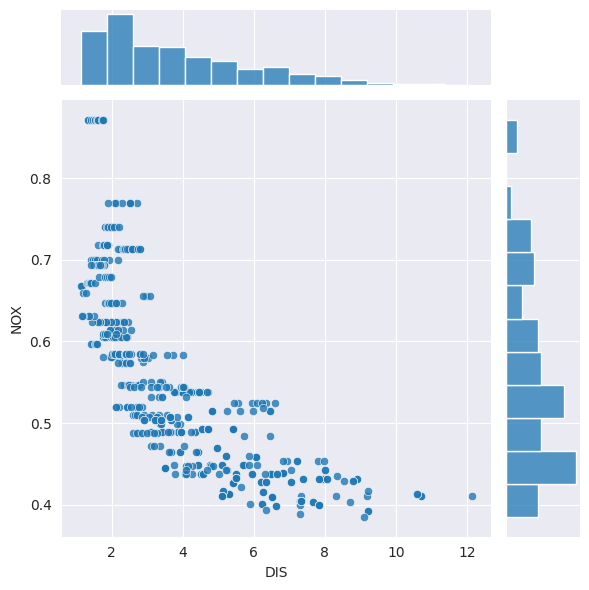

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, x="DIS", y="NOX", joint_kws = dict(alpha=0.8))

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 


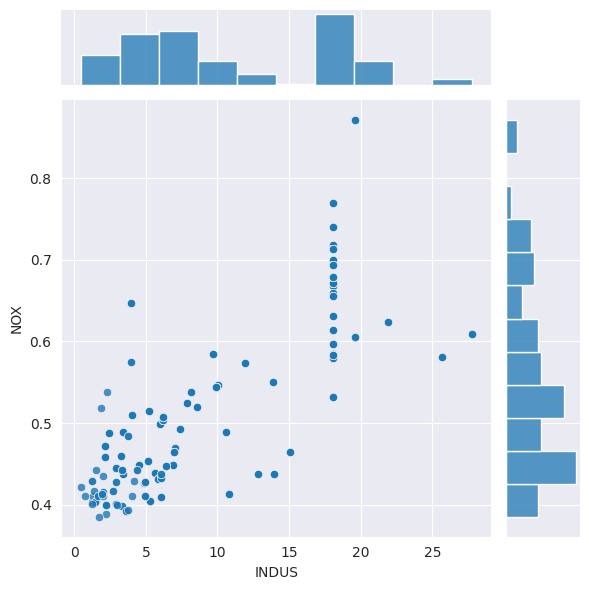

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, x="INDUS", y="NOX", joint_kws = dict(alpha=0.8))

#### % of Lower Income Population vs Average Number of Rooms


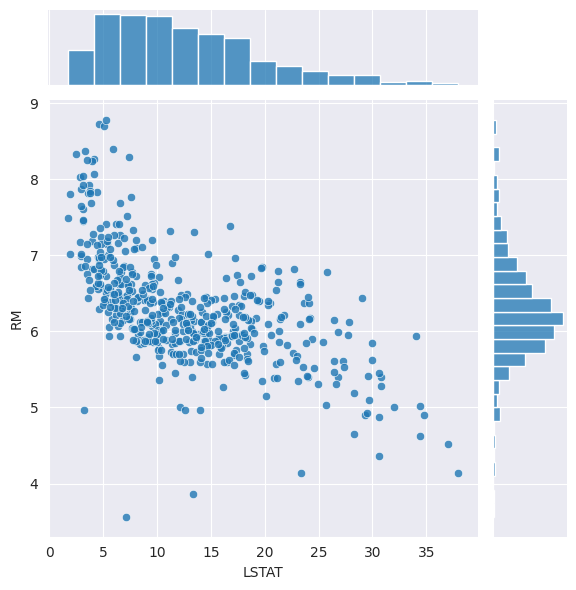

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, x="LSTAT", y="RM", joint_kws = dict(alpha=0.8))

#### % of Lower Income Population versus Home Price



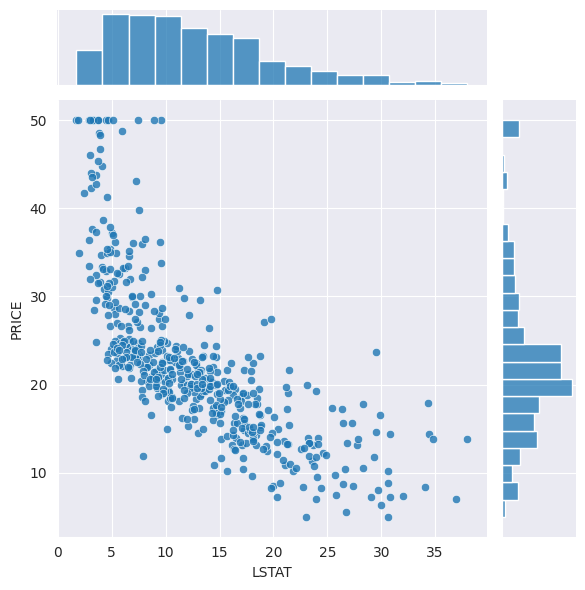

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, x="LSTAT", y="PRICE", joint_kws = dict(alpha=0.8))

#### Number of Rooms versus Home Value



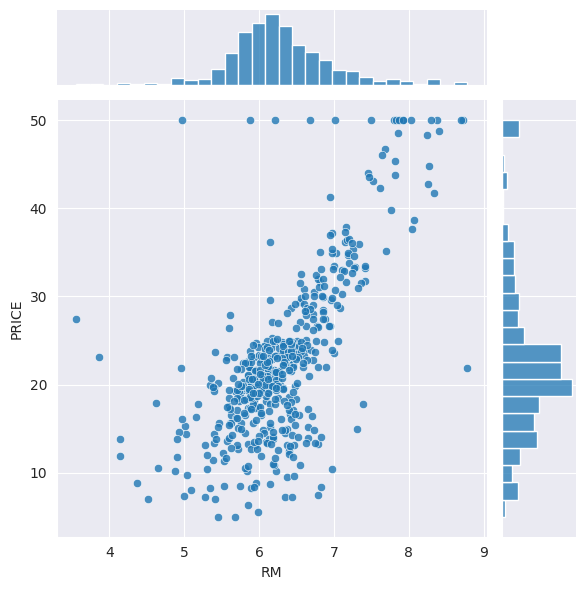

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, x="RM", y="PRICE", joint_kws = dict(alpha=0.8))

# Split Training & Test Dataset

* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20. 



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = data.loc[:, data.columns != 'PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, data['PRICE'], test_size=0.2, random_state=10)

In [ ]:
X_test.shape

(102, 13)

In [ ]:
X_train.shape

(404, 13)

# Multivariable Regression

We have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### First Regression with sklearn



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.750121534530608

### Evaluate the Coefficients of the Model



In [ ]:
coefs = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficients'])
print(coefs)

         Coefficients
CRIM            -0.13
ZN               0.06
INDUS           -0.01
CHAS             1.97
NOX            -16.27
RM               3.11
AGE              0.02
DIS             -1.48
RAD              0.30
TAX             -0.01
PTRATIO         -0.82
B                0.01
LSTAT           -0.58


In [ ]:
reg.intercept_

36.53305138282431

In [ ]:
price_for_extra_room = coefs.loc['RM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price for having an extra room is ${price_for_extra_room:.5}')

The price for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals

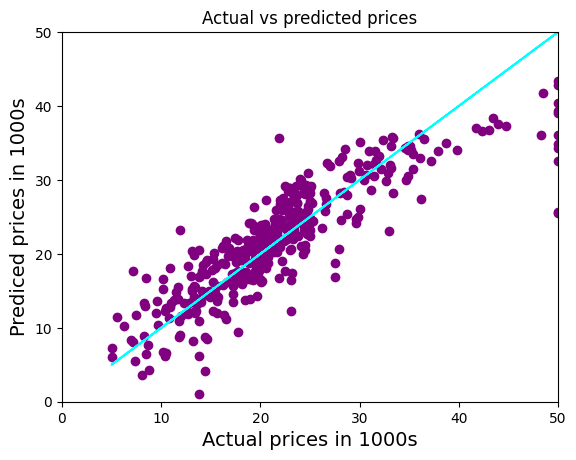

In [ ]:
plt.figure(dpi=100)
predicted_values = reg.predict(X_train)
plt.scatter( y_train, predicted_values, color="purple")
plt.plot(y_train, y_train, color='cyan')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('Actual prices in 1000s', fontsize=14)
plt.ylabel('Prediced prices in 1000s', fontsize=14)
plt.title('Actual vs predicted prices')
plt.show()

In [ ]:
residuals = (y_train - predicted_values)

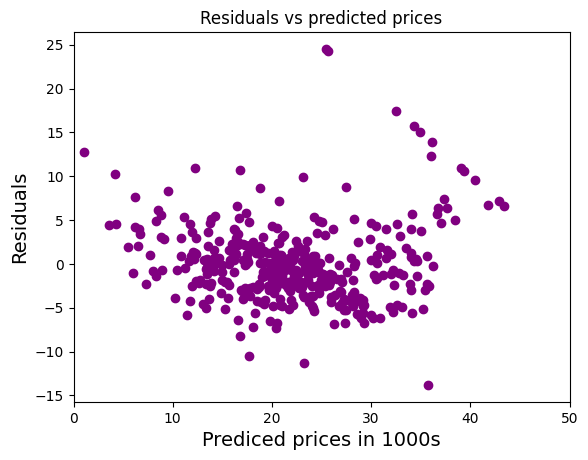

In [ ]:
plt.figure(dpi=100)
plt.scatter( predicted_values, residuals, color="purple")
plt.xlim(0, 50)
plt.xlabel('Prediced prices in 1000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs predicted prices')
plt.show()

* Mean and skewness of the residuals. 
* Seaborn `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)


In [ ]:
residuals.mean()

6.9471381342881085e-16

In [ ]:
residuals.skew()

1.4594428196679727

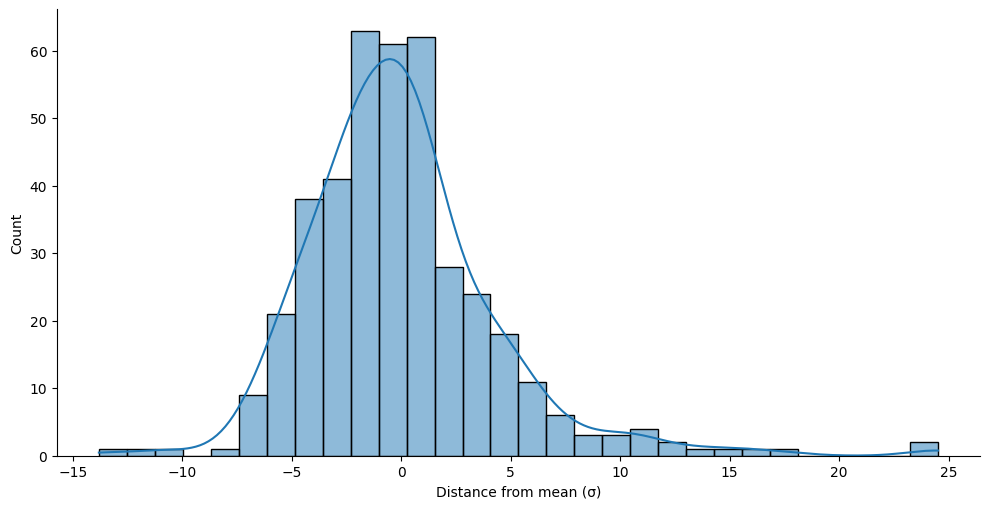

In [ ]:
sns.displot(data=residuals, x=residuals.values,aspect=2, kde=True, bins=30)


plt.xlabel('Distance from mean (σ)')
plt.ylabel('Count')

plt.show()

### Data Transformations for a Better Fit

Investigates if the target `data['PRICE']` could be a suitable candidate for a log transformation. 




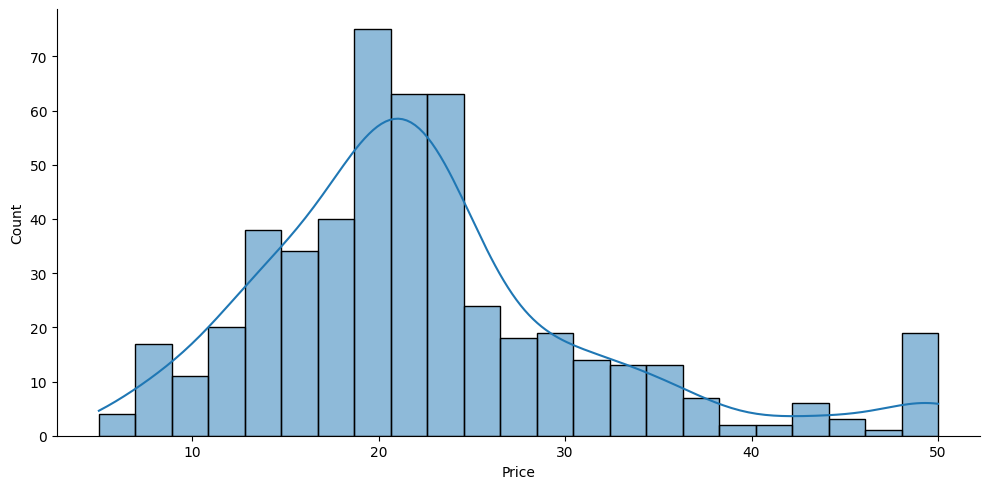

In [ ]:
sns.displot( data['PRICE'],aspect=2, kde=True)


plt.xlabel('Price')
plt.ylabel('Count')

plt.show()

In [ ]:
data['PRICE'].skew()

1.1080984082549072

In [ ]:
log_price = np.log(data['PRICE'])

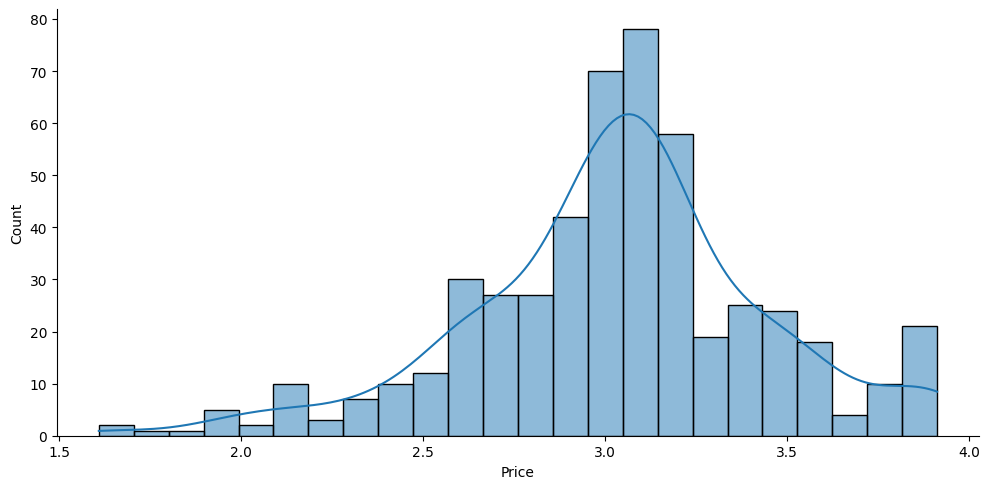

In [ ]:
sns.displot( log_price,aspect=2, kde=True)


plt.xlabel('Price')
plt.ylabel('Count')

plt.show()

In [ ]:
log_price.skew()

-0.33032129530987864

Plot the actual prices against the (transformed) log prices. 

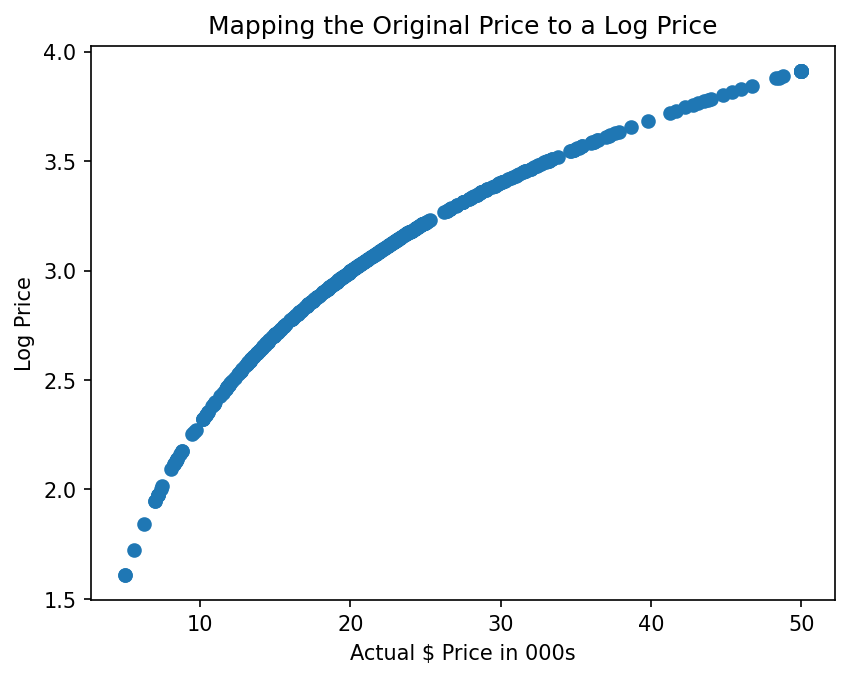

In [ ]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$
 
* Second regression, but this time use the transformed target data. 
* Calculation of r-squared of the regression on the training data and comparison with the first regression. 



In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features, log_price, test_size=0.2, random_state=10)

In [ ]:
reg_log = LinearRegression().fit(X_train_log, y_train_log)

In [ ]:
reg_log.score(X_train_log, y_train_log)

0.7930234826697584

## Evaluating Coefficients with Log Prices



In [ ]:
coefs_log = pd.DataFrame(reg_log.coef_, X_train_log.columns, columns=['Coefficients'])
print(coefs_log)

         Coefficients
CRIM            -0.01
ZN               0.00
INDUS            0.00
CHAS             0.08
NOX             -0.70
RM               0.07
AGE              0.00
DIS             -0.05
RAD              0.01
TAX             -0.00
PTRATIO         -0.03
B                0.00
LSTAT           -0.03


## Regression with Log Prices & Residual Plots



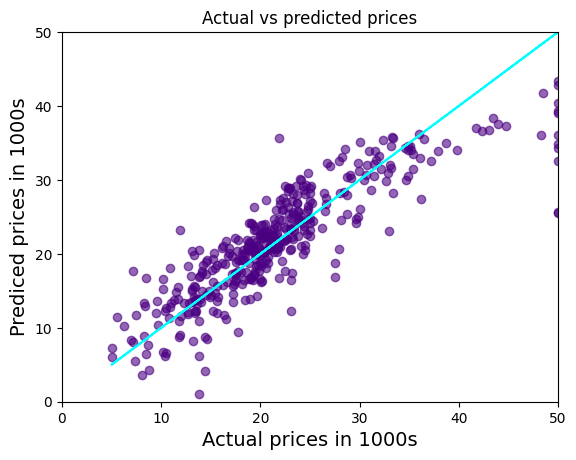

In [ ]:
plt.figure(dpi=100)
predicted_values = reg.predict(X_train)
plt.scatter( y_train, predicted_values, color="indigo", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('Actual prices in 1000s', fontsize=14)
plt.ylabel('Prediced prices in 1000s', fontsize=14)
plt.title('Actual vs predicted prices')
plt.show()

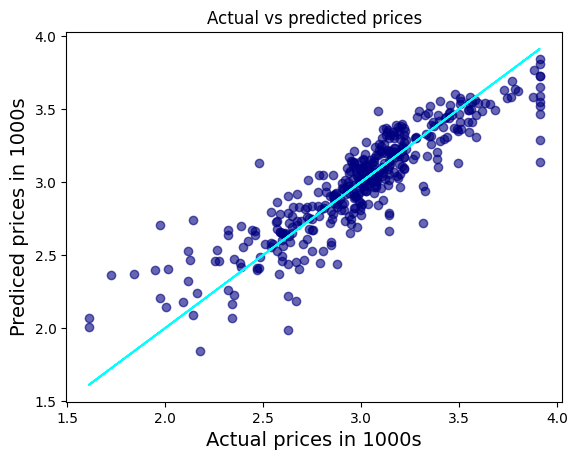

In [ ]:
plt.figure(dpi=100)
predicted_values_log = reg_log.predict(X_train_log)
plt.scatter( y_train_log, predicted_values_log, color="navy", alpha=0.6)
plt.plot(y_train_log, y_train_log, color='cyan')

plt.xlabel('Actual prices in 1000s', fontsize=14)
plt.ylabel('Prediced prices in 1000s', fontsize=14)
plt.title('Actual vs predicted prices')
plt.show()

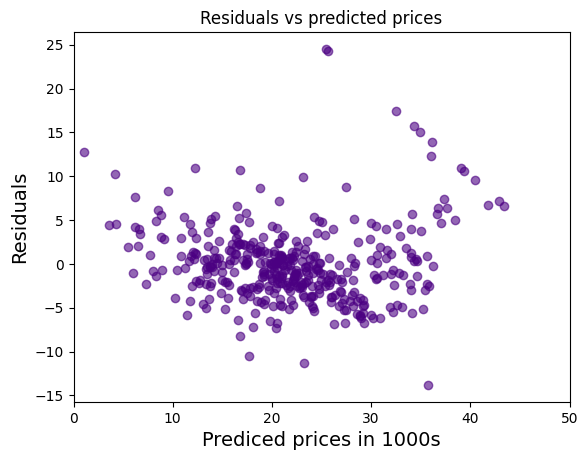

In [ ]:
plt.figure(dpi=100)
plt.scatter( predicted_values, residuals, color="indigo", alpha=0.6)
plt.xlim(0, 50)
plt.xlabel('Prediced prices in 1000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs predicted prices')
plt.show()

In [ ]:
residuals_log = (y_train_log - predicted_values_log)

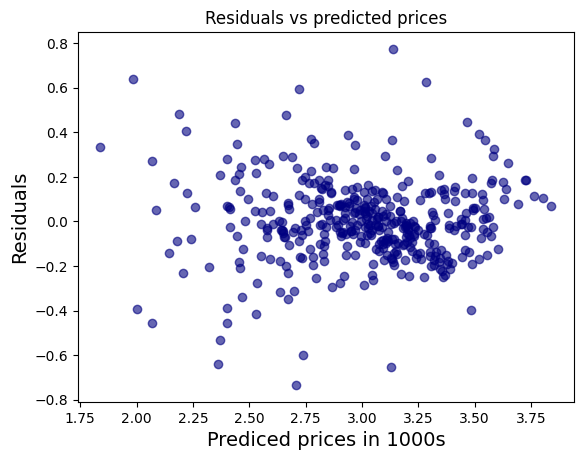

In [ ]:
plt.figure(dpi=100)
plt.scatter( predicted_values_log, residuals_log, color="navy", alpha=0.6)
plt.xlabel('Prediced prices in 1000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs predicted prices')
plt.show()

Mean and skew for the residuals using log prices. 

In [ ]:
residuals_log.mean()

-4.7816536209103276e-17

In [ ]:
residuals_log.skew()

0.09299942594123424

# Compare Out of Sample Performance

Compare the r-squared of the two models on the test dataset.

In [ ]:
print(f'Original Model Test Data r-squared: {reg.score(X_test, y_test):.2}')

Original Model Test Data r-squared: 0.67


In [ ]:
print(f'Log Model Test Data r-squared: {reg_log.score(X_test_log, y_test_log):.2}')

Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients

The average property has the mean value for all its charactistics:

In [ ]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


Prediction of how much the average property is worth using the stats above.

In [ ]:
average_worth = np.exp(reg_log.predict(property_stats)[0])*1000

In [ ]:
print(f'The average worth of a property is estimated equal to ${average_worth:.6}')

The average worth of a property is estimated equal to $20703.2


Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [ ]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
# Solution:
property_stats_new=property_stats
property_stats_new['CHAS']=1
property_stats_new['RM']=nr_rooms
property_stats_new['PTRATIO']=students_per_classroom
property_stats_new['DIS']=distance_to_town
property_stats_new['NOX']=pollution
property_stats_new['LSTAT']=amount_of_poverty

In [ ]:
worth_new = np.exp(reg_log.predict(property_stats_new)[0])*1000

In [ ]:
print(f'The worth of the new property is estimated equal to ${worth_new:.6}')

The worth of the new property is estimated equal to $25792.0
